***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/syp-attacks-threats-and-vulnerabilities/blob/main/README.md) >

## CompTIA Security+ - Course Material 2022
###### Topic: ``Replay Attacks``
***

Course material for the ``CompTIA Security+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

<a id="top"></a>
***
## Table of Contents
***

### [Replay Attacks](#a) <br/><br/>

- [Pass the Hash](#b) <br/><br/>
    - [Prevention](#c) <br/><br/>
        - [Encrypted Channel](#c) <br/><br/>    
            - [``TLS``](#c) <br/><br/>            
            - [``SSL``](#c) <br/><br/>            
        - [Salt the Hash](#d) <br/><br/>
        - [Browser Configuration](#e) <br/><br/>
            - [Cookies](#e) <br/><br/>        
            - [Session IDs](#f) <br/><br/>
- [Session Hijacking - Sidejacking](#g) <br/><br/>
    - [Sidejacking](#g) <br/><br/>
        - [Header Manipulation](#h) <br/><br/>
            - [Information Gathering](#i) <br/><br/>
                - [``Wireshark``](#i) <br/><br/>
                - [``Kismet``](#i) <br/><br/>                
            - [Vulnerability](#j) <br/><br/>
                - [``XSS``](#j) <br/><br/>
            - [Modify Headers](#k) <br/><br/>
                - [``Tamper``](#k) <br/><br/>
                - [``Firesheep``](#k) <br/><br/>
                - [``Scapy``](#k) <br/><br/>            
            - [Modify Cookies](#l) <br/><br/>
                - [Cookie Manager + Firefox Add-on](#l) <br/><br/>
- [Prevention](#m) <br/><br/>
    - [Encrypt End-to-End](#m) <br/><br/>
    - [Encrypt End-to-Somewhere](#n) 
<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="a"></a>
***
### Replay Attacks
***

The communication that we send from our computer to other devices on the network will very often have information that a crafty hacker can use against us - this might be a session ID, it might be login credentials, but they want to be able to find the information in those network flows and be able to use it as an advantage during an attack - this means the attacker needs to find a way to gather that network information.

If they have physical access to the network, they can physically install a network tap that will redirect or send a copy of all network traffic to their workstation - if they don’t have physical access to the network, then they need to find some logical way to redirect that information and one way they might do that is through something like ``ARP`` poisoning or they might just simply add their own code or malware onto your computer and they’ll use your computer to gather that information and then send it back to the attacker.

If the attacker can capture information that can then be replayed across the network to make it seem as if it was coming from you, this is called a ``Replay Attack`` and they want to be able to gather session IDs or credentials and be able to use those credentials later on across the network. 

Although the initial gathering of the information may involve the attacker being on the path between the two devices, that’s not a requirement for the actual replay attack. The replay attack can be done afterwards - the original user does not even need to be on the network at that time.

< [Table of Contents](#top) | [References](#references) >
<a id="b"></a>
***
###### Pass the Hash
***

One very simple kind of replay attack is called pass the hash - this is referring to the hash value that is associated with a password that is sent across the network during the authentication process - if the attacker can gain access to the hash, they may be able to replay that hash back to the server and pretend that they are the original workstation.

In our network here, we have three devices. We have the client device that will be the victim, we have an attacker that’s on the network, and we have the server that is communicating back and forth with the client. 

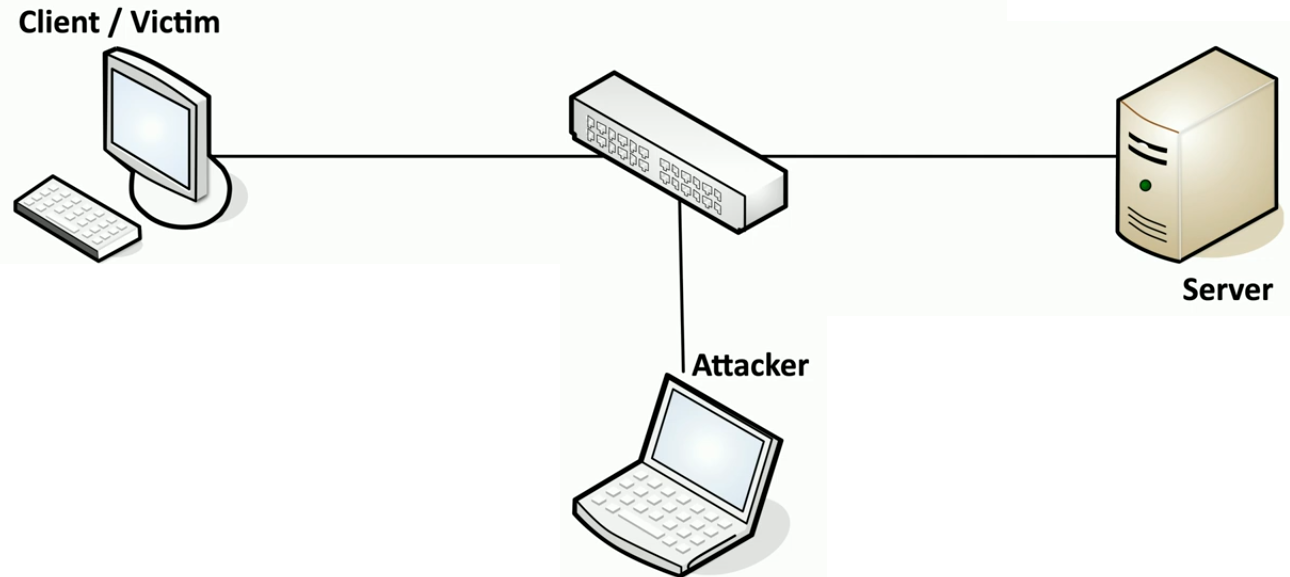

During the initial authentication process where the client sends username and password information to the server, what’s usually sent across the network is the username and a password hash. As that information is being sent to the server, the attacker puts something in the middle of the network - this might be a redirection of the network or an ARP poisoning of some kind, and redirects that hash down to their device as well.

That means that they’re going to have a copy of that hash on their computer. 

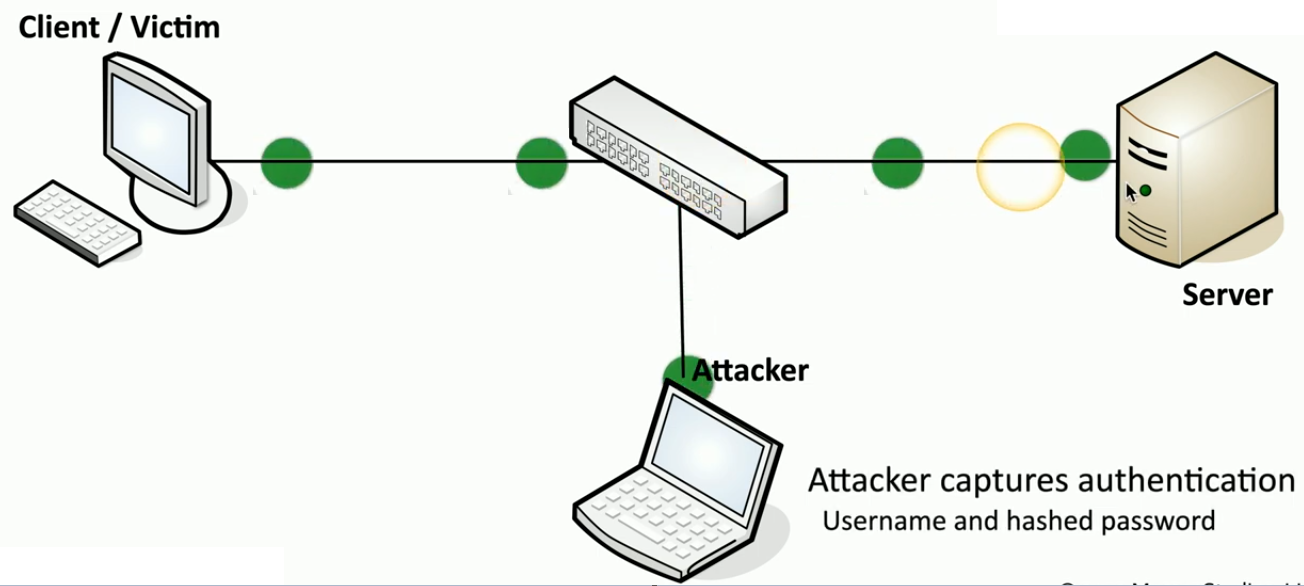

Now that the attacker has that hash, they can pretend to be the original user by sending the username and hash information off to the server as if they were doing this from the original client’s workstation. 

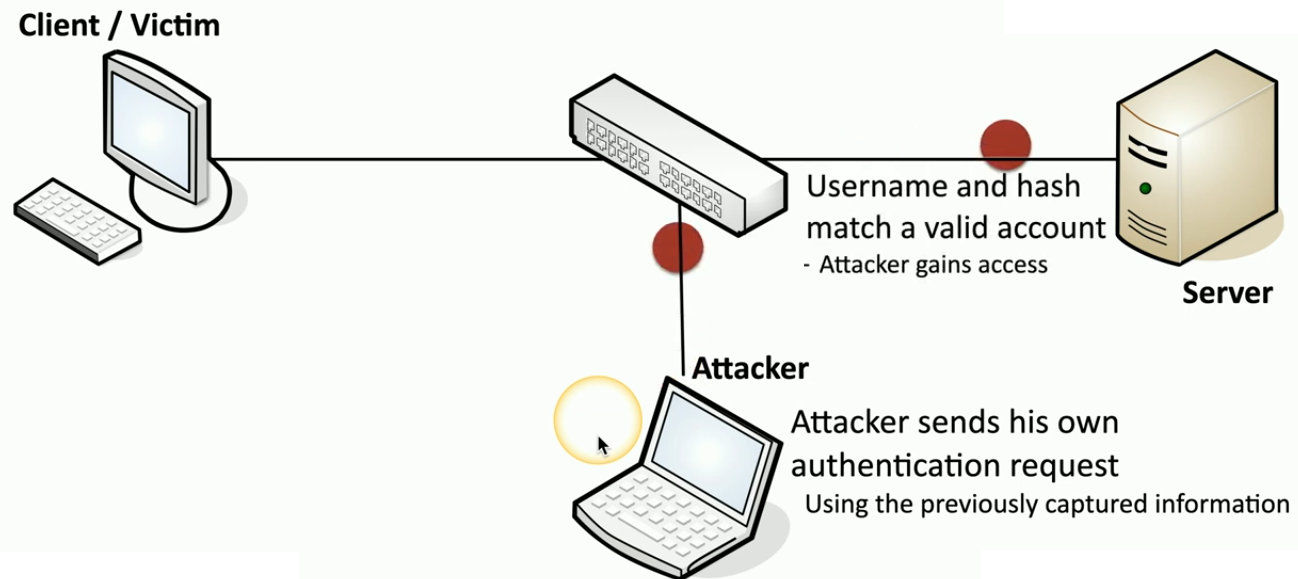

From the perspective of the server, this looks like a normal authentication coming from a legitimate user and that means that the attacker would then have access to that user’s account on that server.

< [Table of Contents](#top) | [References](#references) >
<a id="c"></a>
***
###### Prevention - Encrypted Channel - ``SSL`` - ``TLS``
***

One way that developers can avoid this type of pass the hash attack is to make sure that the client and the server are always communicating over an encrypted channel such as SSL or TLS - if that channel is sending encrypted data, it doesn’t matter what the attacker gathers - they won’t be able to find any of the hash or anything else inside of that encrypted information.

< [Table of Contents](#top) | [References](#references) >
<a id="d"></a>
***
###### Salt the Hash
***

Another technique developers use is to salt the hash - they might salt it with the session ID and when that session idea is sent across to the server to authenticate, it’s a one time authentication process. 

Even if somebody was to gather that information across the network as it was being sent originally, they would not be able to reuse it and the replay attack of this kind would not be successful.

< [Table of Contents](#top) | [References](#references) >
<a id="e"></a>
***
###### Browser Configuration - Cookies
***

This is also why we want to be sure that the cookies saved in our browser configuration on our computers are secure. 

The browser cookies that are on your computer may contain information that an attacker might be able to use for a replay attack - these browser cookies often have information that’s specific to you. It may have personalization details or session management information and it usually is something that’s very unique to your sessions that you’re using in the browser.

< [Table of Contents](#top) | [References](#references) >
<a id="f"></a>
***
###### Browser Configuration - Session IDs
***

Not only is there personal or private information that might be in these cookies, these cookies can often contain session IDs as well and if somebody was to gain access to an active session ID, they could pose as you when communicating with another service. 

< [Table of Contents](#top) | [References](#references) >
<a id="g"></a>
***
###### Session Hijacking - Sidejacking
***

The key to a session hijack or sidejack, is for the attacker to somehow gain access to the session ID.

When the client first logs into the server, they are assigned a session ID and from that point going forward, the victim is including that session ID when communicating with the service - this means that the user doesn’t have to constantly keep logging in with their username and password every time they communicate back to that website server. Instead, they’ll simply send the session ID and that will confirm that the user that’s communicating to the web server has already been authenticated.

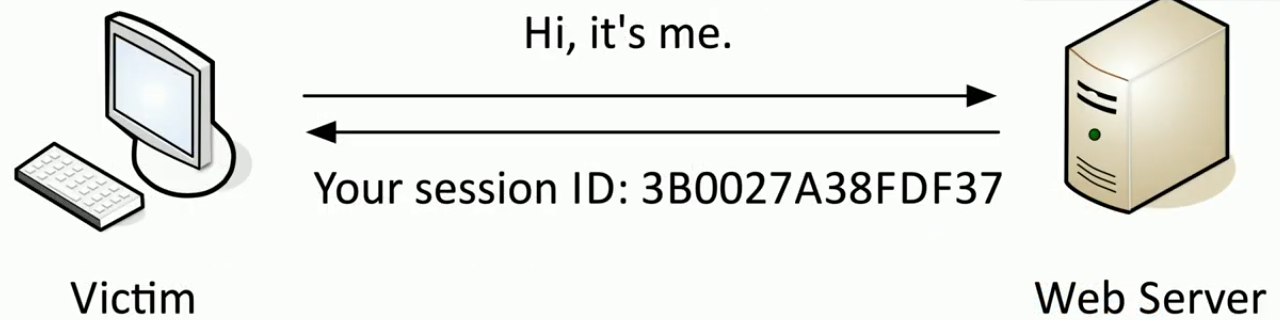

If that attacker gains access to that session ID, they could have used that information to pose as the victim and communicate directly to that service without requiring a username or password - this is why it’s important to use an encrypted protocol such as ``SSL`` or ``TLS`` when communicating across the network, which means that the attackers would have no way to gather that session ID off of the network flows.

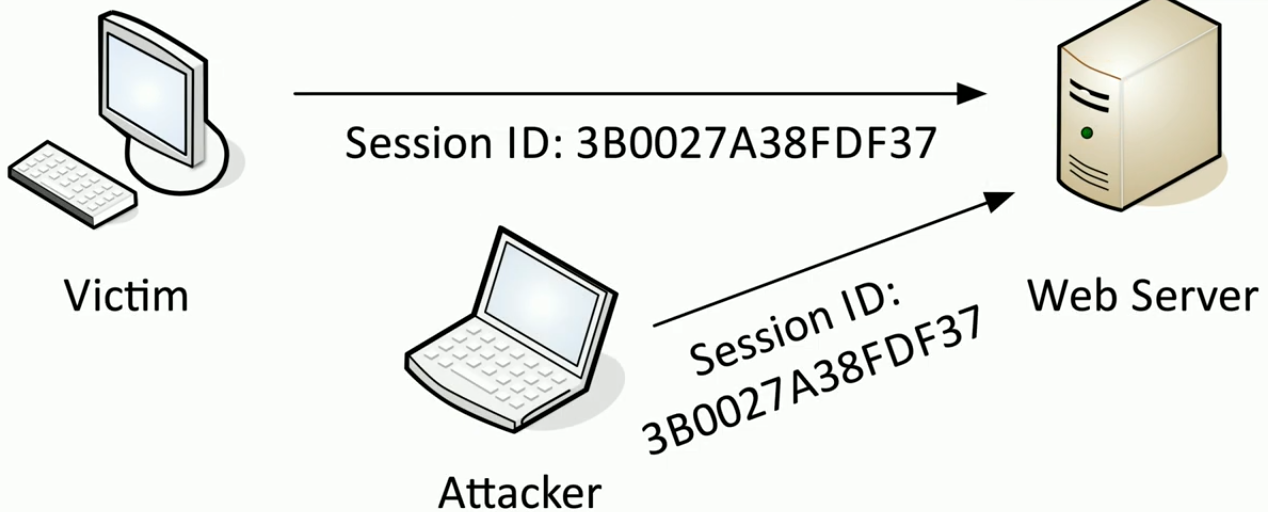

< [Table of Contents](#top) | [References](#references) >
<a id="h"></a>
***
###### Header Manipulation
***

For this session ID attack to work, the attacker needs to first get the session information. 

< [Table of Contents](#top) | [References](#references) >
<a id="i"></a>
***
###### Information Gathering
***

Might gather that directly from the network using ``Wireshark`` or ``Kismet`` to gather it from the wired or the wireless networks.

< [Table of Contents](#top) | [References](#references) >
<a id="j"></a>
***
###### ``XSS``
***

If the server has a ``XSS`` vulnerability, the attacker could use the server to have session IDs sent directly to the attacker instead of gathering them from the network. 

< [Table of Contents](#top) | [References](#references) >
<a id="k"></a>
***
###### Modify Headers
***

Once the attacker has the session ID information, they need to modify the headers that are being sent to the server and they might use a third party utility to be able to do that in real time - ``Tamper`` - ``Firesheep`` - ``Scapy``. 

< [Table of Contents](#top) | [References](#references) >
<a id="l"></a>
***
###### Modify Cookies
***

The attacker could also modify their browser cookies to make them look identical to those that would come from the victim’s computer. 

< [Table of Contents](#top) | [References](#references) >
<a id="m"></a>
***
###### Prevention - Encrypt End-to-End
***

One way to prevent these types of replay and session attacks is to make sure that all of the communication between both sides is always encrypted - they can’t capture session IDs if it happens to be in this encrypted traffic flow.

Turning on encryption on a web server adds some additional overhead but is going to protect all of the data that’s being sent back and forth - there are some browser extensions (``Firefox`` - ``HTTPS Everywhere`` - ``Enforce-TLS``) you can get that will force communication to be ``HTTPS`` or ``TLS``, but many sites these days will only operate as an ``HTTPS`` or encrypted channel, so if you were to go to ``professormesser.com`` you will always be connected over ``HTTPS``.

< [Table of Contents](#top) | [References](#references) >
<a id="n"></a>
***
###### Prevention - Encrypt End-to-Somewhere
***

If you’re communicating to a service that doesn’t support ``HTTPS``, or it’s using a different type of communication mechanism, then you may want to use something like an encrypted tunnel to at least have part of the communication flow be in this encrypted channel - still ``in-the-clear`` for part of the journey.

That way, if anybody does gather that information on that encrypted flow, they would not be able to use any of the information inside of that network traffic.

Personal VPN - ``OpenVPN`` - ``VyprVPN``.

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

J. "Professor" Messer, "CompTIA Security+ (SY0-601) Course Notes," [professormesser.com](https://web.archive.org/web/20220521181010/https://www.professormesser.com/security-plus/sy0-601/sy0-601-video/sy0-601-comptia-security-plus-course/), September 2021.

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK